**Purpose for study only**

# Data understanding

**Fake and real news dataset**

title : The title of the article

text : The text of the article

subject : The subject of the article

date : The date at which the article was posted

Dataset : https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
# from sklearn.model import train_test_split

# Download Fake Data from csv file and define status is 0.
fake_1='./Fake.csv'
dfraw = pd.read_csv(fake_1)
dfraw= pd.DataFrame(dfraw)
dfraw= dfraw.iloc[0:5000,:]
dfraw['status']= 0

# Download True Data from csv file  and define status is 1.
True_1='./True.csv'
dfraw1 = pd.read_csv(True_1)
dfraw1= pd.DataFrame(dfraw1)
dfraw1= dfraw1.iloc[0:5000,:]
dfraw1['status']= 1
 
# Concatnate  Fake and True data
df=pd.concat([dfraw, dfraw1], axis=0)
# # print(df.head())
# # print(df.info())
print(df.columns)
print(df.shape)

#Create new dataframe
title_data= df.loc[:,['date','status']]

Index(['title', 'text', 'subject', 'date', 'status'], dtype='object')
(10000, 5)


# Data Preparation

Cleaning data in column  'title', 'text' and  'subject'


*   All character to be lower
*   Remove  \[.*?\] 

*   Remove punctuation
*   Remove words containing numbers


In [22]:
import re
import string
cols=['title', 'text', 'subject']

for col in cols:
    
    def clean_text_round1(text):
        ##'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\w*\d\w*', '', text)
        return text

    round1 = lambda x: clean_text_round1(x)

    title_data[col] = pd.DataFrame(df[col].apply(round1))
    # print(title_data_clean.head())

    # Apply a second round of cleaning
    def clean_text_round2(text):
        '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
        text = re.sub('[‘’“”…]', '', text)
        text = re.sub('\n', '', text)
        return text
    round2 = lambda x: clean_text_round2(x)
    title_data[col] = pd.DataFrame(title_data[col].apply(round2))
  
#Save data into pickle and csv
title_data.to_pickle('data_clean.pkl')
title_data.to_csv('data_clean.csv')
print(title_data.head())
data=title_data
# print(data)

                date  status  \
0  December 31, 2017       0   
1  December 31, 2017       0   
2  December 30, 2017       0   
3  December 29, 2017       0   
4  December 25, 2017       0   

                                               title  \
0   donald trump sends out embarrassing new years...   
1   drunk bragging trump staffer started russian ...   
2   sheriff david clarke becomes an internet joke...   
3   trump is so obsessed he even has obamas name ...   
4   pope francis just called out donald trump dur...   

                                                text subject  
0  donald trump just couldn t wish all americans ...    news  
1  house intelligence committee chairman devin nu...    news  
2  on friday it was revealed that former milwauke...    news  
3  on christmas day donald trump announced that h...    news  
4  pope francis used his annual christmas day mes...    news  


Tokenizing  uses nltk  


*   Remove word as the,is ,and etc using stopwords
*   Remove ending that are -ing ,-s ,-able and -ly of words 

*   Create  dictionary of word list

In [23]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from itertools import chain
from nltk.stem import RegexpStemmer
nltk.download('stopwords')
nltk.download('punkt')

def tokenize_text_list(ls):
    
    # print("working on")
    stop_words = set(stopwords.words('english'))
    st = RegexpStemmer('ing$|s$|able$|ly$', min=4)
    word_tokens  = list(chain.from_iterable([word_tokenize(ls)]))  
    # filtered_sentence = [ps.stem(w) for w in word_tokens ] 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [st.stem(w) for w in filtered_sentence ]  
    return filtered_sentence

data.tokenized_texts = data.title.map(tokenize_text_list)
data['tokenized_texts'] = data.title.map(tokenize_text_list)
p=set(chain.from_iterable(data.tokenized_texts))

#crate dictionay of wording
vocabulary_ = {v: k for k, v in enumerate(set(chain.from_iterable(data.tokenized_texts)))  }
# print(vocabulary_)

#save vocabulary in pickle
with open('vocabulary.pkl', 'wb') as handle:
    pickle.dump(vocabulary_, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print(len(vocabulary_))
f=pd.DataFrame(list( vocabulary_ .items()),columns=['word','ind'])
f.sort_values('ind', ascending=True).reset_index(inplace=True)
f.to_csv("index_test.csv")
# f.to_pickle("Fake_new\index_test.pkl")


#apply index of word on title
def  word_index(word):
    return[vocabulary_[v] for v in word]

data['word_index_line']=data.tokenized_texts.map(word_index)
data.word_index_line=data.tokenized_texts.map(word_index)
print(data.columns)
data.to_csv("index_coulmn_test.csv")
data.to_pickle("index_coulmn_test.pkl")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aunch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aunch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-23-712bc1de6e11>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.tokenized_texts = data.title.map(tokenize_text_list)


8525
Index(['date', 'status', 'title', 'text', 'subject', 'tokenized_texts',
       'word_index_line'],
      dtype='object')


In [24]:
#Download data already tokenize and specify index
data = pd.read_pickle('./index_coulmn_test.pkl')
fake = data.iloc[:5000,:]
true = data.iloc[5000:,:]
with open('./vocabulary.pkl', 'rb') as handle:
    vocabulary_ = pickle.load(handle)

In [25]:
from itertools import chain
#fuction change index into word
def get_key(val): 
  p=[]
  for word in val:
    for key, value in vocabulary_.items(): 
         if word == value: 
            p.append(str(key))
  return p 

rou = lambda x: get_key(x)
fake['word_column'] = pd.DataFrame(fake['word_index_line'].apply(rou))
true['word_column'] = pd.DataFrame(true['word_index_line'].apply(rou))
# print(data)

#combine  word of each line
fake_p=set(chain.from_iterable(fake.word_column))
true_p=set(chain.from_iterable(true.word_column))
# print(p)

<ipython-input-25-83a2e87d6351>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['word_column'] = pd.DataFrame(fake['word_index_line'].apply(rou))
<ipython-input-25-83a2e87d6351>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['word_column'] = pd.DataFrame(true['word_index_line'].apply(rou))


**WordCloud of Fake news**

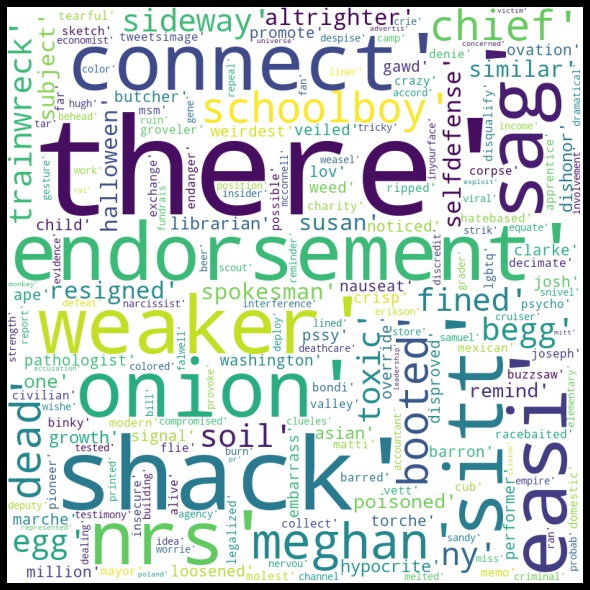

In [26]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import nltk
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                # stopwords = stopwords, 
                min_font_size = 10).generate(str(fake_p))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**WordCloud of real news**

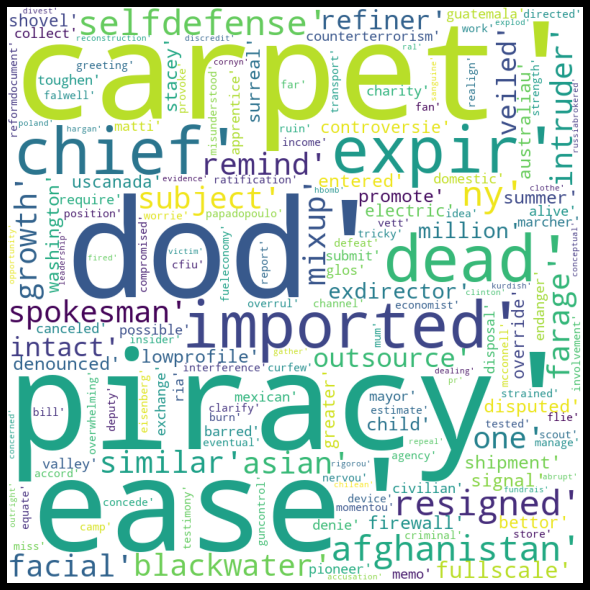

In [27]:
# stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                # stopwords = stopwords,
                min_font_size = 10).generate(str(true_p))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
 
plt.show()

Vectorize_sequence

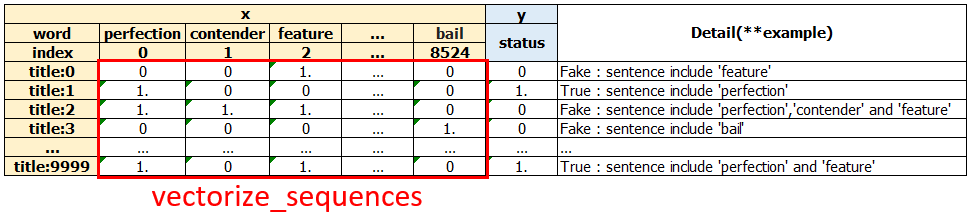

In [28]:
from sklearn.model_selection import train_test_split

#Download data already tokenize and specify index
data = pd.read_pickle('./index_coulmn_test.pkl')
print(data.head())

with open('./vocabulary.pkl', 'rb') as handle:
    vocabulary_ = pickle.load(handle)
print(len(vocabulary_))


def vectorize_sequences(sequences, dimension=len(vocabulary_)):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
   
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s        
    return results

# vectorized title data
x= vectorize_sequences(data.word_index_line)
print(x.shape)

# Setting status data to array
y = np.asarray(data.status).astype('float32')
print(y.shape)

#Split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
p=pd.DataFrame(y_train)
p.to_csv('y_train.csv')
q=pd.DataFrame(y_test)
q.to_csv('y_test.csv')

#Split  train dataset to validation  dataset
x_val, partial_x_train, y_val, partial_y_train = train_test_split(x_train,y_train, test_size=0.6)
print(x_val.shape , y_val.shape)
print(partial_x_train.shape,partial_y_train.shape)


                date  status  \
0  December 31, 2017       0   
1  December 31, 2017       0   
2  December 30, 2017       0   
3  December 29, 2017       0   
4  December 25, 2017       0   

                                               title  \
0   donald trump sends out embarrassing new years...   
1   drunk bragging trump staffer started russian ...   
2   sheriff david clarke becomes an internet joke...   
3   trump is so obsessed he even has obamas name ...   
4   pope francis just called out donald trump dur...   

                                                text subject  \
0  donald trump just couldn t wish all americans ...    news   
1  house intelligence committee chairman devin nu...    news   
2  on friday it was revealed that former milwauke...    news   
3  on christmas day donald trump announced that h...    news   
4  pope francis used his annual christmas day mes...    news   

                                     tokenized_texts  \
0  [donald, trump, send, emba

# Modeling

**Classification  model**

 input  data : vectorized text  size =( len of vocabulary ,)

 Hiddle layer : (16,16,1)

 Output data : Probability data

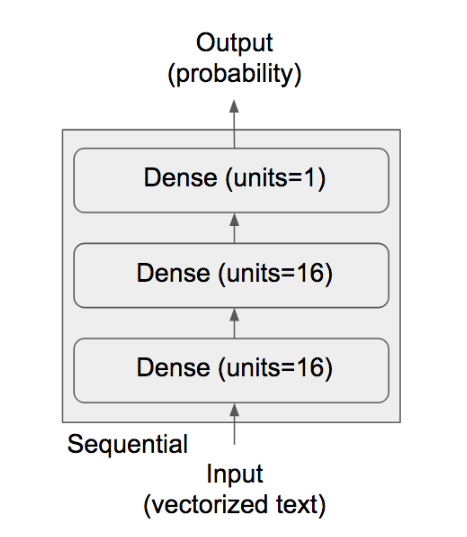

**Activation function**

1. Relu : output > 0

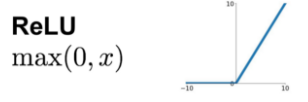

2. sigmoid : Probability output =[-1,1]

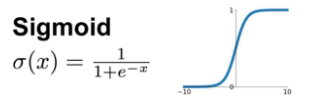

In [29]:
from keras import models
from keras import layers
from keras import optimizers

#Crate model from keras
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(vocabulary_),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                136416    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 136,705
Trainable params: 136,705
Non-trainable params: 0
_________________________________________________________________
None


Trainning model with 20 epochs and mini-batch is 128  with  validation_data

In [30]:
#compile model using binary_crossentropy  because { fake:0 , true:1}
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

history_dict = history.history

Epoch 1/20
38/38 [==============================] - 2s 25ms/step - loss: 0.6672 - accuracy: 0.6073 - val_loss: 0.5556 - val_accuracy: 0.8559
Epoch 2/20
38/38 [==============================] - 1s 14ms/step - loss: 0.5032 - accuracy: 0.8978 - val_loss: 0.4067 - val_accuracy: 0.9231
Epoch 3/20
38/38 [==============================] - 1s 15ms/step - loss: 0.3468 - accuracy: 0.9531 - val_loss: 0.2950 - val_accuracy: 0.9347
Epoch 4/20
38/38 [==============================] - 1s 15ms/step - loss: 0.2298 - accuracy: 0.9639 - val_loss: 0.2222 - val_accuracy: 0.9378
Epoch 5/20
38/38 [==============================] - 1s 18ms/step - loss: 0.1519 - accuracy: 0.9698 - val_loss: 0.1806 - val_accuracy: 0.9400
Epoch 6/20
38/38 [==============================] - 1s 19ms/step - loss: 0.1071 - accuracy: 0.9734 - val_loss: 0.1614 - val_accuracy: 0.9400
Epoch 7/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0734 - accuracy: 0.9824 - val_loss: 0.1547 - val_accuracy: 0.9378
Epoch 8/20
38

# Evaluation

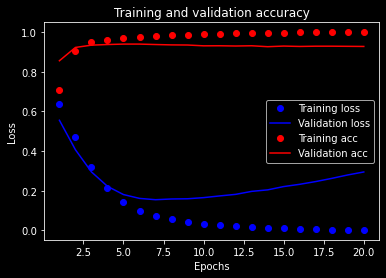

In [31]:
import matplotlib.pyplot as plt
#Plot accuracy  and loss of model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss & accuracy')
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


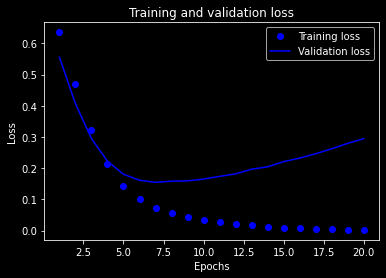

In [32]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

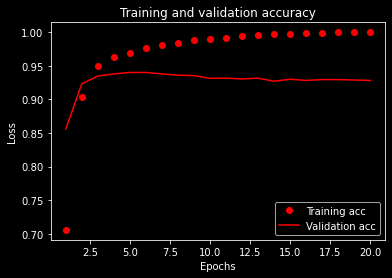

In [33]:
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
#Fit model uses 4 epochs to prevent overfit
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(vocabulary_),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=128)


Epoch 1/4
63/63 [==============================] - 1s 9ms/step - loss: 0.6477 - accuracy: 0.7493
Epoch 2/4
63/63 [==============================] - 1s 9ms/step - loss: 0.3917 - accuracy: 0.9275
Epoch 3/4
63/63 [==============================] - 1s 9ms/step - loss: 0.1948 - accuracy: 0.9556
Epoch 4/4
63/63 [==============================] - 1s 9ms/step - loss: 0.1110 - accuracy: 0.9681


# Deployment

In [35]:
# Accuracy show 95%
results = model.evaluate(x_test, y_test)
print(results)

#predict data
pred = model.predict(x_test)
pre=pd.DataFrame(pred)
pre.to_csv('y_predict.csv')

63/63 [==============================] - 0s 4ms/step - loss: 0.1370 - accuracy: 0.9470
[0.13704362511634827, 0.9470000267028809]


Reference:

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/1-Data-Cleaning.ipynb

https://medium.com/mmp-li/deep-learning-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%89%E0%B8%9A%E0%B8%B1%E0%B8%9A%E0%B8%AA%E0%B8%B2%E0%B8%A1%E0%B8%B1%E0%B8%8D%E0%B8%8A%E0%B8%99-ep-2-optimization-activation-function-%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B8%AA%E0%B8%9A%E0%B8%B2%E0%B8%A2%E0%B9%86%E0%B8%AA%E0%B9%84%E0%B8%95%E0%B8%AA%E0%B9%8C%E0%B8%8A%E0%B8%B4%E0%B8%A5%E0%B9%86-9feb5a87e3b2


https://guopai.github.io/ml-blog17.html

http://dataminingtrend.com/2014/data-mining-techniques/crisp-dm-example/


